# ECE 420 Lab 3 - Spectrogram (Python Part)

In this lab, we implement a Short-Time Fourier Transform (STFT) to create a spectrogram.  
We will practice windowing, zero-padding, FFT, and scaling.


## Why STFT over a single FFT?

**Q:** Why would you use a STFT over a single-snapshot FFT?  
**A:** Because STFT captures how frequency content evolves over time, while a single FFT only gives overall frequency info.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
from numpy.fft import fft

FRAME_SIZE = 1024
ZP_FACTOR = 2
FFT_SIZE = FRAME_SIZE * ZP_FACTOR


## Windowing

We apply a Hamming window to each frame to reduce spectral leakage.


In [2]:
def hamming_window(N):
    n = np.arange(N)
    return 0.54 - 0.46 * np.cos((2 * np.pi * n) / (N - 1))

window = hamming_window(FRAME_SIZE)

## Why ignore half the FFT?

**Q:** What allows us to ignore the second half of the FFT?  
**A:** Conjugate symmetry of the Fourier Transform (for real signals).


## FFT with Zero-Padding and Scaling

We apply windowing, zero-padding, FFT, and log-scaling to each frame.


In [5]:
def ece420ProcessFrame(frame):
    # Apply Hamming window
    frame = frame * window
    
    # Zero padding
    padded = np.zeros(FFT_SIZE)
    padded[:FRAME_SIZE] = frame
    
    # FFT
    curFft = fft(padded)
    
    # Magnitude squared
    mag = np.abs(curFft[:FFT_SIZE//2])**2
    
    # Log scaling
    log_mag = np.log1p(mag)
    
    # Avoid divide-by-zero
    if np.max(log_mag) > 0:
        scaled = log_mag / np.max(log_mag)
    else:
        scaled = log_mag   # stays all zeros
    
    return scaled


## Processing Audio

We process the test signal frame by frame to build the spectrogram.


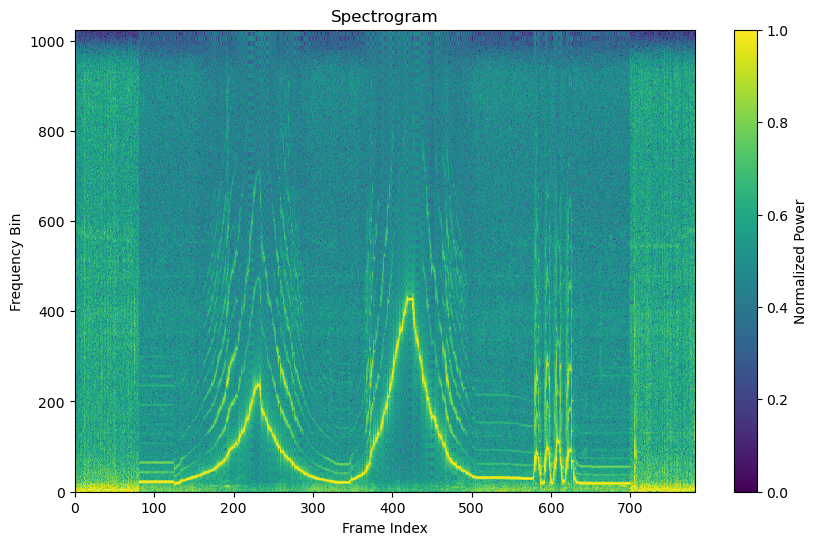

In [6]:
Fs, data = read('test_single_tones.wav')
numFrames = len(data) // FRAME_SIZE

bmp = np.zeros((numFrames, FFT_SIZE//2))

for i in range(numFrames):
    frame = data[i*FRAME_SIZE:(i+1)*FRAME_SIZE]
    bmp[i, :] = ece420ProcessFrame(frame)

plt.figure(figsize=(10, 6))
plt.pcolormesh(bmp.T, vmin=0, vmax=1, shading='auto')
plt.xlabel("Frame Index")
plt.ylabel("Frequency Bin")
plt.title("Spectrogram")
plt.colorbar(label="Normalized Power")
plt.show()

## Reflection

**Q:** Why do we use logarithmic scaling?  
**A:** To compress the dynamic range so weaker frequencies are visible alongside strong tones.
